In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
#built the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [16]:
# build the dataset

block_size = 3
X, Y = [], []
for w in words:

    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
C = torch.randn((27, 2))
C

tensor([[ 0.0399, -0.6726],
        [-0.4797, -0.3535],
        [-0.2638,  0.1596],
        [-0.0816, -0.3690],
        [ 0.5164,  0.6236],
        [-0.0835,  0.4924],
        [ 1.1192,  2.1845],
        [-2.7399,  0.1113],
        [-2.0250,  0.4698],
        [-0.0823, -0.2431],
        [-0.5832, -0.7136],
        [-0.4432,  1.6646],
        [ 1.3507, -0.8761],
        [-0.3661,  0.3215],
        [ 0.1856, -0.5913],
        [ 1.6299,  1.5056],
        [ 1.0442,  0.8731],
        [ 1.7649,  0.0158],
        [ 0.2082, -1.0091],
        [ 0.2271, -1.3486],
        [ 1.3655,  1.2740],
        [ 0.7294, -0.3897],
        [ 0.6210,  2.3449],
        [-0.0626, -0.0561],
        [-1.2456,  0.0117],
        [-0.8243, -0.0086],
        [-1.8860, -1.2426]])

In [7]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.0835,  0.4924])

In [8]:
C[5]

tensor([-0.0835,  0.4924])

In [15]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [10]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [11]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
h

tensor([[-0.4910, -0.2965, -0.6450,  ...,  0.1137, -0.4779,  0.6294],
        [ 0.0727, -0.8703, -0.8354,  ..., -0.8772,  0.7159, -0.1409],
        [ 0.7490, -0.9127, -0.7455,  ..., -0.4268, -0.2445, -0.8375],
        ...,
        [ 1.0000, -0.9989, -0.8966,  ...,  1.0000, -0.9964,  1.0000],
        [ 0.9991, -0.9997, -0.6068,  ...,  0.9999, -0.9977,  1.0000],
        [ 0.9999, -0.9943,  0.8157,  ...,  0.9999, -0.8371,  0.9995]])

In [ ]:
# 32, 100
#  1, 100

In [17]:
emb.view(emb.shape[0], 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [18]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [19]:
logits = h @ W2 + b2
logits.shape

torch.Size([228146, 27])

In [20]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
prob.shape

torch.Size([228146, 27])

In [21]:
prob[0].sum()

tensor(1.)

In [22]:
nll_loss = -prob[torch.arange(X.shape[0]), Y].log().mean()
nll_loss

tensor(15.2198)

In [23]:
# ------

In [ ]:
# training, validation, test split
# 80 / 10 / 10

In [ ]:
# build the dataset

def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:

        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '---->', itos[ix])
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xval, Yval = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [64]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [129]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((3*10, 200), generator=g)
b1 = torch.randn((200), generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C, W1, b1, W2, b2]

In [130]:
sum(p.nelement() for p in parameters)

11897

In [131]:
for p in parameters:
    p.requires_grad = True

In [68]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [132]:
lri = []
lossi = []
stepi  = []

In [138]:
for i in range(200000):

    # minibatch construct
    batch_size = 128
    ix = torch.randint(0, Xtr.shape[0], (batch_size,))
    # forward pass
    emb = C[Xtr[ix]] # 32, 3, 2
    h = torch.tanh(emb.view(-1,W1.shape[0]) @ W1 + b1) # 32, 100
    logits = h @ W2 + b2 # 32, 27
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    #lr = lrs[i]
    lr = 0.1 if i< 100000 else 0.01
    for p in parameters:
        p.data -= lr * p.grad
    
    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())

2.1490941047668457


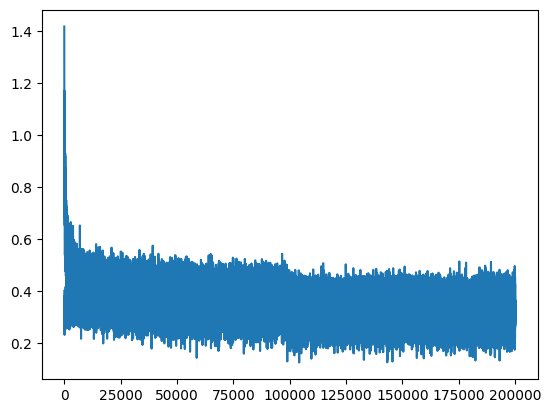

In [139]:
plt.plot(stepi, lossi)

In [140]:
emb = C[Xtr] # 32, 3, 2
h = torch.tanh(emb.view(-1,W1.shape[0]) @ W1 + b1) # 32, 100
logits = h @ W2 + b2 # 32, 27
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0791, grad_fn=<NllLossBackward0>)

In [141]:
emb = C[Xval] # 32, 3, 2
h = torch.tanh(emb.view(-1,W1.shape[0]) @ W1 + b1) # 32, 100
logits = h @ W2 + b2 # 32, 27
loss = F.cross_entropy(logits, Yval)
print(loss.item())

2.139160394668579


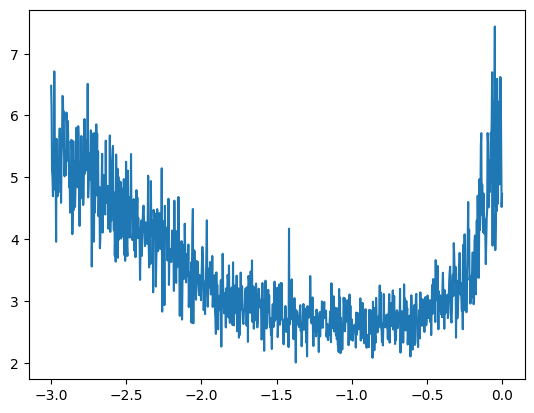

In [50]:
plt.plot(lri, lossi)

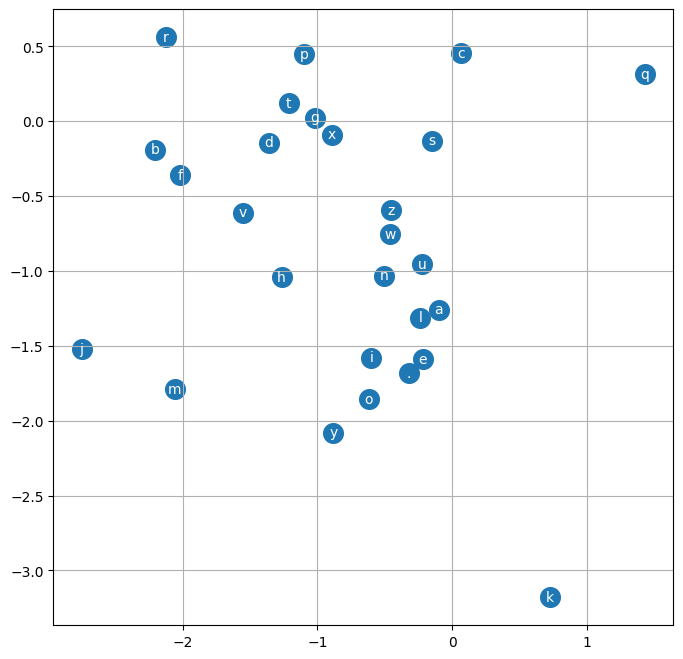

In [146]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 2].data, C[:, 3].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 2].item(), C[i, 3].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [144]:
# sample from the model

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])] # (1, block_size,d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
            
    print(''.join(itos[i] for i in out))

mona.
kayah.
see.
med.
ryla.
renard.
endraeg.
aderedielin.
shi.
jen.
eden.
estanar.
katelmanka.
cayshabergiagriel.
kindo.
jennox.
berlyn.
brence.
ryyah.
faeha.
